In [63]:
import h5py
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from obspy.core.utcdatetime import UTCDateTime
from datetime import datetime
import matplotlib.dates as mdates

In [57]:
froot = "./DASNIF/mean/*.npy"
flists = np.sort(glob.glob(froot))
print(f"find {len(flists)} snapshot")

find 3981 snapshot


In [58]:
m = np.zeros([6000, ])
for fn in tqdm(flists):
    m = np.c_[m, np.load(fn)]

100%|██████████| 3981/3981 [02:09<00:00, 30.79it/s] 


In [91]:
froot = "/data/data2/south-data-ejm/hdd/South-C1-LR-95km-P1kHz-GL50m-SP2m-FS200Hz_2021-11-01T16_09_15-0700/*.h5"
flists = np.sort(glob.glob(froot))
timestamp = [datetime.utcfromtimestamp(UTCDateTime(i.split("_")[-1].split('.')[0]).timestamp) for i in flists]
# x_lims = list(map(datetime.utcfromtimestamp, [timestamp[0], timestamp[-1]]))
# x_lims = mdates.date2num(x_lims)

In [92]:
timestamp

[datetime.datetime(2021, 11, 1, 23, 11, 14),
 datetime.datetime(2021, 11, 1, 23, 12, 14),
 datetime.datetime(2021, 11, 1, 23, 13, 14),
 datetime.datetime(2021, 11, 1, 23, 14, 14),
 datetime.datetime(2021, 11, 1, 23, 15, 14),
 datetime.datetime(2021, 11, 1, 23, 16, 14),
 datetime.datetime(2021, 11, 1, 23, 17, 14),
 datetime.datetime(2021, 11, 1, 23, 18, 14),
 datetime.datetime(2021, 11, 1, 23, 19, 14),
 datetime.datetime(2021, 11, 1, 23, 20, 14),
 datetime.datetime(2021, 11, 1, 23, 21, 14),
 datetime.datetime(2021, 11, 1, 23, 22, 14),
 datetime.datetime(2021, 11, 1, 23, 23, 14),
 datetime.datetime(2021, 11, 1, 23, 24, 14),
 datetime.datetime(2021, 11, 1, 23, 25, 14),
 datetime.datetime(2021, 11, 1, 23, 26, 14),
 datetime.datetime(2021, 11, 1, 23, 27, 14),
 datetime.datetime(2021, 11, 1, 23, 28, 14),
 datetime.datetime(2021, 11, 1, 23, 29, 14),
 datetime.datetime(2021, 11, 1, 23, 30, 14),
 datetime.datetime(2021, 11, 1, 23, 31, 14),
 datetime.datetime(2021, 11, 1, 23, 32, 14),
 datetime.

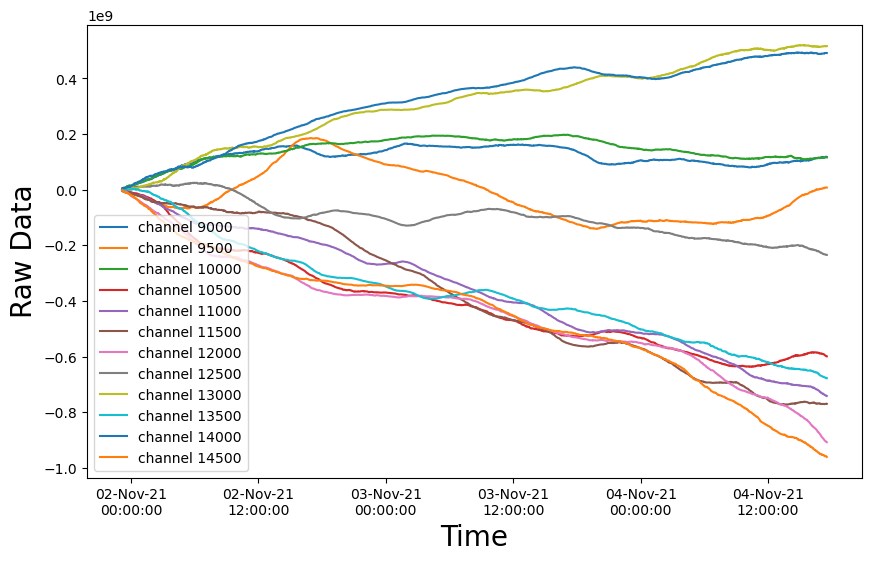

In [114]:
plt.figure(figsize = (10, 6), dpi = 100)
for i in np.arange(0, 6000, 500):
    plt.plot(timestamp, m[i, 1:], label = f"channel {9000 + i}")
plt.legend()
plt.xlabel("Time", fontsize = 20)
plt.ylabel("Raw Data", fontsize = 20)
date_format = mdates.DateFormatter('%d-%b-%y\n%H:%M:%S')
plt.gca().xaxis.set_major_formatter(date_format)
# plt.ylim([-1e9, 1e9])
# plt.gca().set_yscale('log')

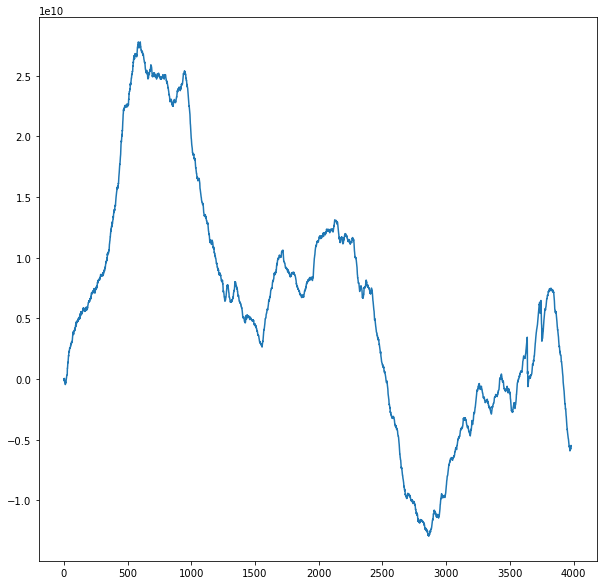

In [143]:
plt.figure(figsize = (10, 10))
# plt.imshow(np.log(np.abs(m[:, 1:])), cmap = 'RdBu', aspect = 0.3)
plt.plot(np.sum(m, axis = 0))

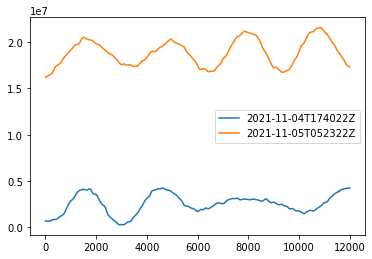

In [41]:
cid = 13000
froot = "/data/data2/south-data-ejm/hdd/South-C1-LR-95km-P1kHz-GL50m-SP2m-FS200Hz_2021-11-04T10_37_24-0700/*.h5"
flists = np.sort(glob.glob(froot))
f = h5py.File(flists[0], "r")
rawData = f['Acquisition']['Raw[0]']['RawData']
plt.plot(rawData[cid, :], label = flists[0].split("_")[-1].split('.')[0])
f.close()

f = h5py.File(flists[-2], "r")
rawData = f['Acquisition']['Raw[0]']['RawData']
plt.plot(rawData[cid, :], label = flists[-2].split("_")[-1].split('.')[0])
f.close()

plt.legend()

In [127]:
ds = h5py.File("/data/data6/OOI-channel-files/South-C1-LR-95km-P1kHz-GL50m-SP2m-FS200Hz__channel47008.h5", "r")
d2 = ds['data'][:]
ds.close()

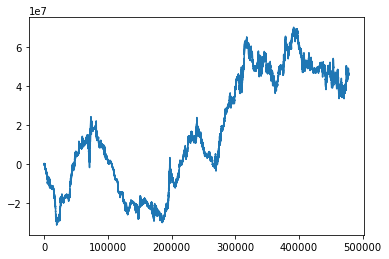

In [128]:
plt.plot(d2[::100])